In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 27.0 MB/s eta 0:00:00


In [1]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [7]:
!pip install --upgrade ultralytics ray


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 10.0 MB/s eta 0:00:00


In [8]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

In [10]:
def train_yolo(model, data_yaml, total_epochs=30, freeze_epochs=5, freeze_layer_count=30):
    """
    Train the YOLO model with flexible freezing and unfreezing.

    :param model: YOLO model
    :param data_yaml: Path to data.yaml file
    :param total_epochs: Total number of training epochs
    :param freeze_epochs: Number of epochs to train with frozen layers
    :param freeze_layer_count: Number of layers to freeze from the beginning
    """
    if freeze_epochs > 0:
        print(f"Training with first {freeze_layer_count} layers frozen for {freeze_epochs} epochs...")
        # Freeze the specified number of layers
        for i, (name, param) in enumerate(model.model.named_parameters()):
            if i < freeze_layer_count:
                param.requires_grad = False
            else:
                param.requires_grad = True

        # Train with frozen layers
        results_frozen = model.train(data=data_yaml, epochs=freeze_epochs, batch=-1)

        print("Unfreezing all layers...")
        # Unfreeze all layers
        for param in model.model.parameters():
            param.requires_grad = True

    # Continue training or start training if no freezing was done
    remaining_epochs = total_epochs - freeze_epochs
    print(f"Training all layers for {remaining_epochs} epochs...")
    results = model.train(data=data_yaml, epochs=remaining_epochs, batch=-1)

    return results

# Load the pre-trained model
model = YOLO('yolov8n.pt')

# Path to data.yaml file
data_yaml = "/content/drive/MyDrive/kidney/kidney/data.yaml"

# Train the model
results = train_yolo(model, data_yaml, total_epochs=30, freeze_epochs=5, freeze_layer_count=30)

# Save the final model
model.save('final_model.pt')

print("Training completed!")


Training with first 30 layers frozen for 5 epochs...
Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/kidney/kidney/data.yaml, epochs=5, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_c

train: Scanning /content/drive/MyDrive/kidney/kidney/train/labels.cache... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/kidney/kidney/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.94G      2.232       3.71      1.255         34        640: 100%|██████████| 132/132 [00:56<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.78it/s]

                   all        123        325      0.451      0.182      0.219     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.94G      2.214      2.209      1.265         23        640: 100%|██████████| 132/132 [00:36<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.13it/s]

                   all        123        325      0.632      0.551      0.534      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.94G      2.176      1.834      1.296         12        640: 100%|██████████| 132/132 [00:31<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.21it/s]

                   all        123        325      0.645      0.545      0.561      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.94G        2.1       1.53      1.248         33        640: 100%|██████████| 132/132 [00:30<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        123        325      0.702      0.631      0.616      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.94G      2.057      1.382      1.203         22        640: 100%|██████████| 132/132 [00:34<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.36it/s]

                   all        123        325      0.741      0.612      0.657      0.267



5 epochs completed in 0.059 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]


                   all        123        325      0.748      0.612      0.658      0.266
Speed: 0.9ms preprocess, 6.2ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to runs/detect/train2
Unfreezing all layers...
Training all layers for 25 epochs...
Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/kidney/kidney/data.yaml, epochs=25, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=

train: Scanning /content/drive/MyDrive/kidney/kidney/train/labels.cache... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/kidney/kidney/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0004375), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25       8.5G      2.007      1.302       1.19        151        640: 100%|██████████| 19/19 [00:24<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all        123        325       0.78      0.555      0.605      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      8.31G      2.006      1.261      1.188        133        640: 100%|██████████| 19/19 [00:21<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all        123        325      0.579      0.455      0.479       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25       8.3G      1.962      1.232       1.21        164        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.635      0.545      0.562      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      8.29G      2.011      1.232      1.211        156        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        123        325       0.11       0.24     0.0677     0.0255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       8.3G      2.032      1.208      1.211        130        640: 100%|██████████| 19/19 [00:24<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all        123        325      0.406        0.4      0.289     0.0999



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      8.28G      2.014      1.156      1.249        143        640: 100%|██████████| 19/19 [00:24<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all        123        325     0.0161      0.252     0.0332      0.012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      8.21G      2.039      1.172      1.233        157        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all        123        325      0.495      0.403      0.393      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      8.32G      2.029      1.119      1.229        151        640: 100%|██████████| 19/19 [00:23<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.603      0.551      0.518      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      8.26G      1.995       1.09      1.225        148        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all        123        325      0.626      0.548      0.492      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      8.31G      1.961      1.062      1.207        158        640: 100%|██████████| 19/19 [00:26<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]


                   all        123        325      0.685      0.594      0.612      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      8.28G      1.939      1.043      1.196        125        640: 100%|██████████| 19/19 [00:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.58s/it]

                   all        123        325      0.731      0.545      0.605      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      8.25G      1.958      1.016      1.222        144        640: 100%|██████████| 19/19 [00:22<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all        123        325      0.588        0.5      0.472      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      8.29G      1.942       1.01       1.19        155        640: 100%|██████████| 19/19 [00:25<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]

                   all        123        325      0.773      0.631      0.683      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      8.26G      1.924      1.002      1.181        170        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        123        325      0.737      0.634      0.693      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       8.3G      1.947     0.9945      1.187        179        640: 100%|██████████| 19/19 [00:24<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all        123        325      0.732      0.648      0.657      0.244


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      8.25G      1.953     0.9837      1.207         92        640: 100%|██████████| 19/19 [00:27<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        123        325      0.754      0.674      0.692      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      8.25G      1.881     0.9628      1.185         98        640: 100%|██████████| 19/19 [00:23<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        123        325      0.728      0.655      0.691      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25       8.2G      1.892     0.9686      1.209         95        640: 100%|██████████| 19/19 [00:28<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        123        325       0.82      0.637       0.73      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       8.2G      1.867     0.9469      1.181        103        640: 100%|██████████| 19/19 [00:31<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        123        325      0.777      0.698      0.722      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       8.2G      1.849     0.9074      1.168         92        640: 100%|██████████| 19/19 [00:24<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all        123        325      0.826      0.643      0.703      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      8.21G      1.805     0.9021      1.159         93        640: 100%|██████████| 19/19 [00:21<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        123        325      0.802      0.677      0.726      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       8.2G      1.791     0.8579       1.16        101        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        123        325      0.779      0.674      0.722      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       8.2G      1.774     0.8494      1.139        102        640: 100%|██████████| 19/19 [00:21<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.761      0.696      0.741      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25       8.2G      1.745     0.8456      1.136        105        640: 100%|██████████| 19/19 [00:22<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        123        325      0.805      0.662      0.722      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       8.2G       1.73     0.8327      1.116         95        640: 100%|██████████| 19/19 [00:21<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all        123        325      0.802      0.683      0.712      0.305



25 epochs completed in 0.209 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 5.6MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]


                   all        123        325      0.762      0.698      0.741      0.322
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train22
Training completed!


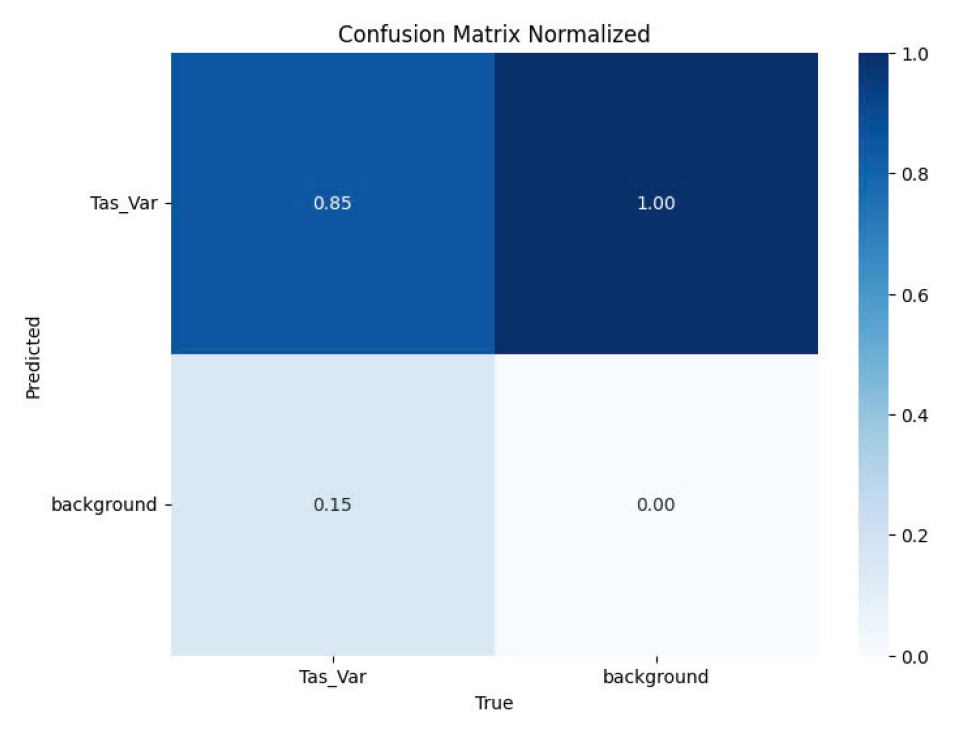

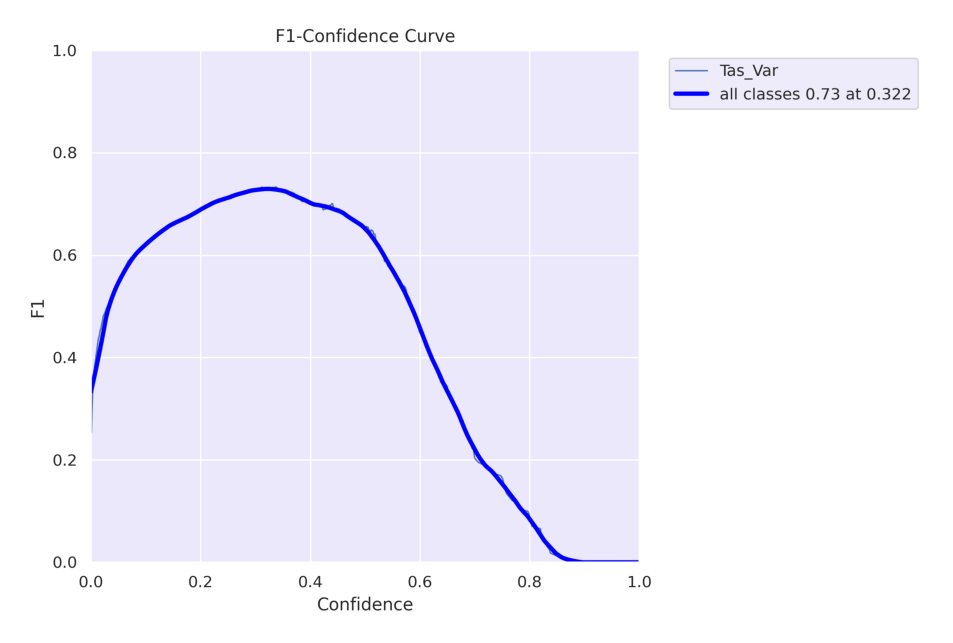

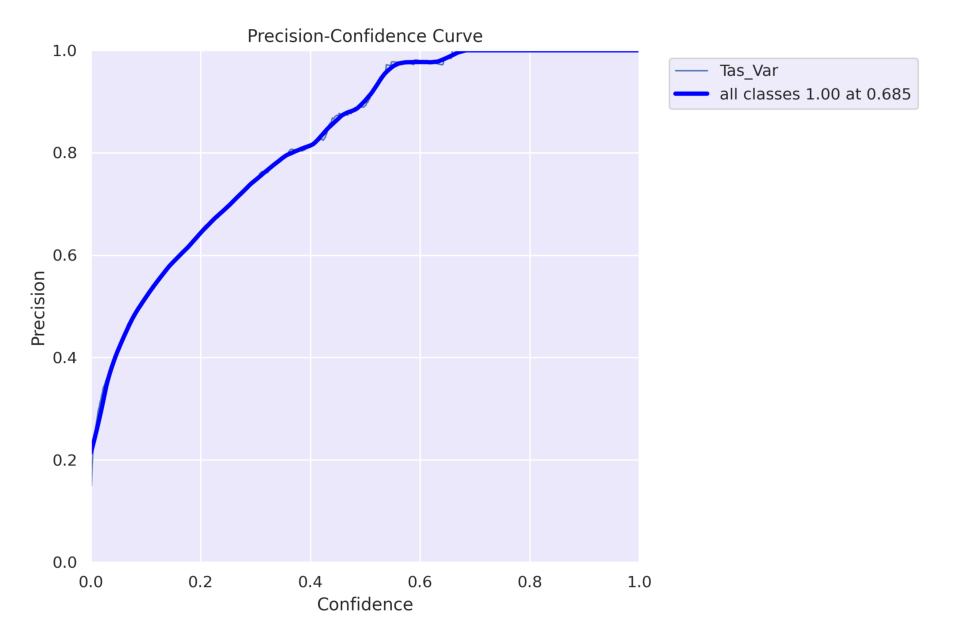

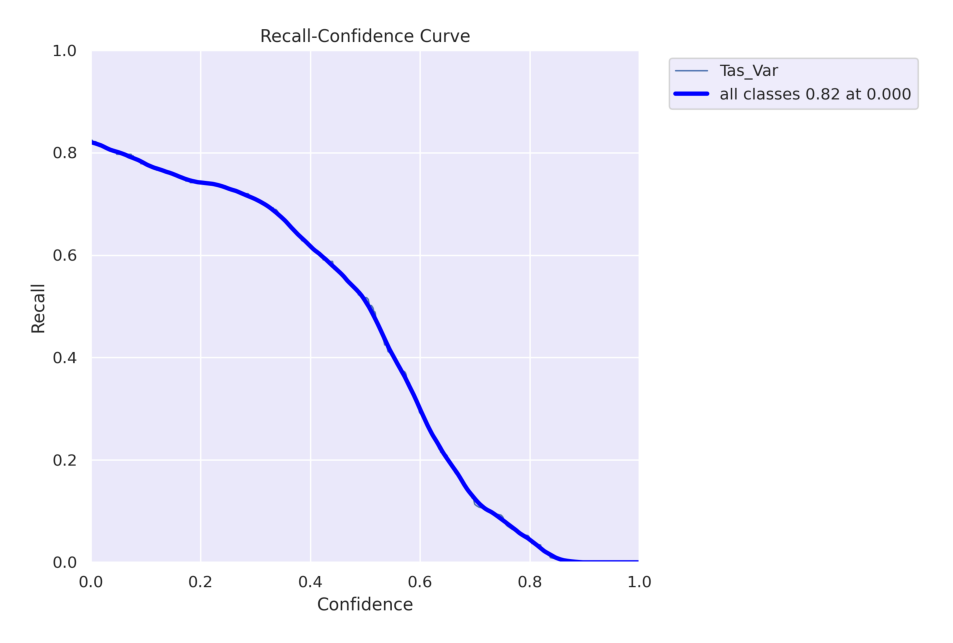

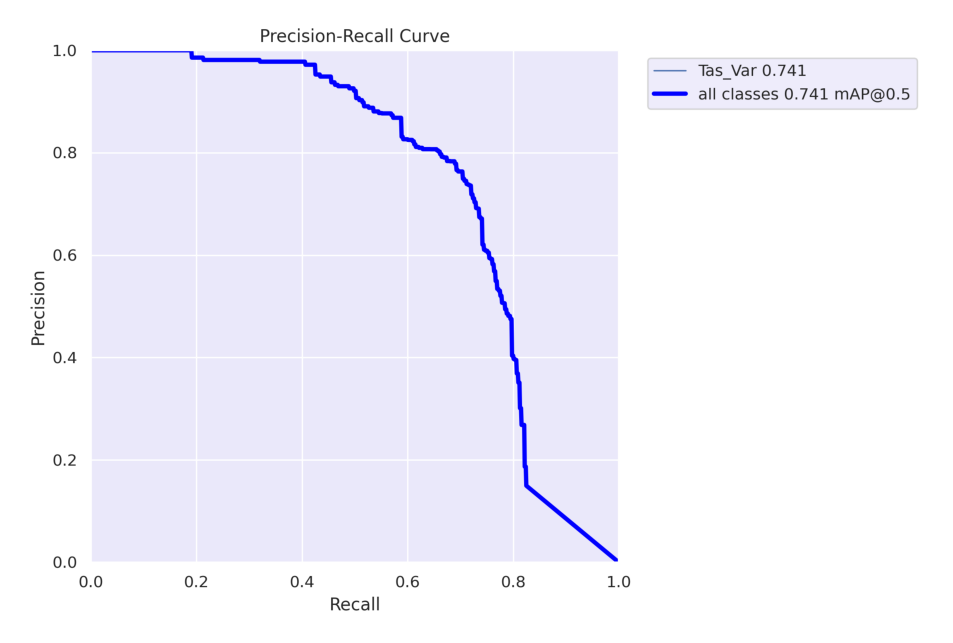

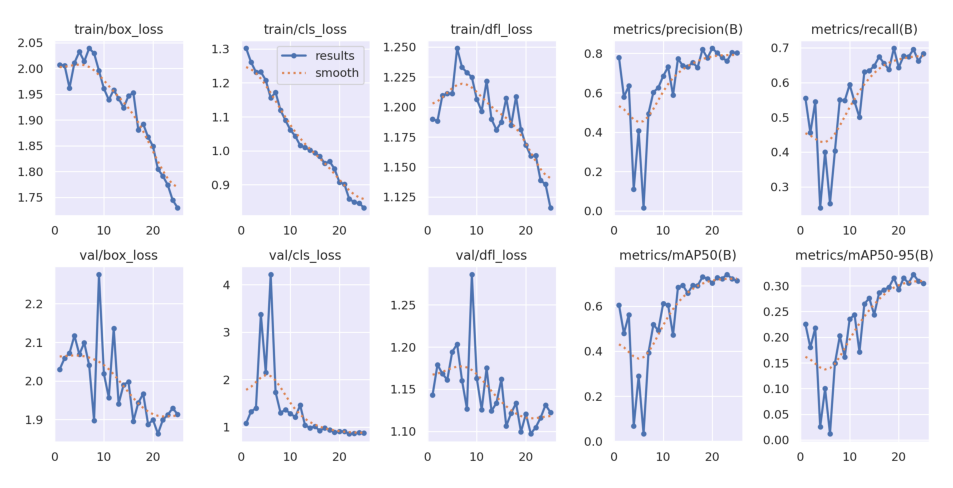

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = './train22/'

# Display the images
display_images(post_training_files_path, image_files)


In [16]:
Result_Final_model = pd.read_csv('./train22/results.csv')
Result_Final_model.tail(10)

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
15,16,1.9530,0.98371,1.2073,0.80357,0.72385,0.74177,0.33636,1.8957,0.92321,1.1063,0.000812,0.000812,0.000812,NaN,0.77385,0.79177,0.38636
16,17,1.8808,0.96283,1.1846,0.77834,0.70538,0.74070,0.34215,1.9434,0.98390,1.1216,0.000733,0.000733,0.000733,NaN,0.75538,0.79070,0.39215
17,18,1.8922,0.96855,1.2087,0.86983,0.68692,0.77975,0.34701,1.9668,0.94462,1.1334,0.000654,0.000654,0.000654,NaN,0.73692,0.82975,0.39701
18,19,1.8668,0.94687,1.1811,0.82673,0.74846,0.77199,0.36537,1.8877,0.89553,1.0993,0.000574,0.000574,0.000574,NaN,0.79846,0.82199,0.41537
19,20,1.8490,0.90742,1.1682,0.82603,0.69308,0.75329,0.34245,1.8989,0.91037,1.1206,0.000495,0.000495,0.000495,NaN,0.74308,0.80329,0.39245
20,21,1.8046,0.90210,1.1592,0.85207,0.72692,0.77638,0.36540,1.8631,0.91030,1.0971,0.000416,0.000416,0.000416,NaN,0.77692,0.82638,0.41540
21,22,1.7914,0.85785,1.1596,0.82856,0.72385,0.77190,0.35504,1.8990,0.85869,1.1047,0.000337,0.000337,0.000337,NaN,0.77385,0.82190,0.40504
22,23,1.7740,0.84942,1.1388,0.81103,0.74572,0.79087,0.37219,1.9121,0.86354,1.1161,0.000258,0.000258,0.000258,NaN,0.79572,0.84087,0.42219
23,24,1.7446,0.84555,1.1356,0.85524,0.71151,0.77161,0.35920,1.9294,0.88432,1.1313,0.000178,0.000178,0.000178,NaN,0.76151,0.82161,0.40920
24,25,1.7299,0.83270,1.1161,0.85233,0.73308,0.76215,0.35465,1.9137,0.87441,1.1226,0.000099,0.000099,0.000099,NaN,0.78308,0.81215,0.40465


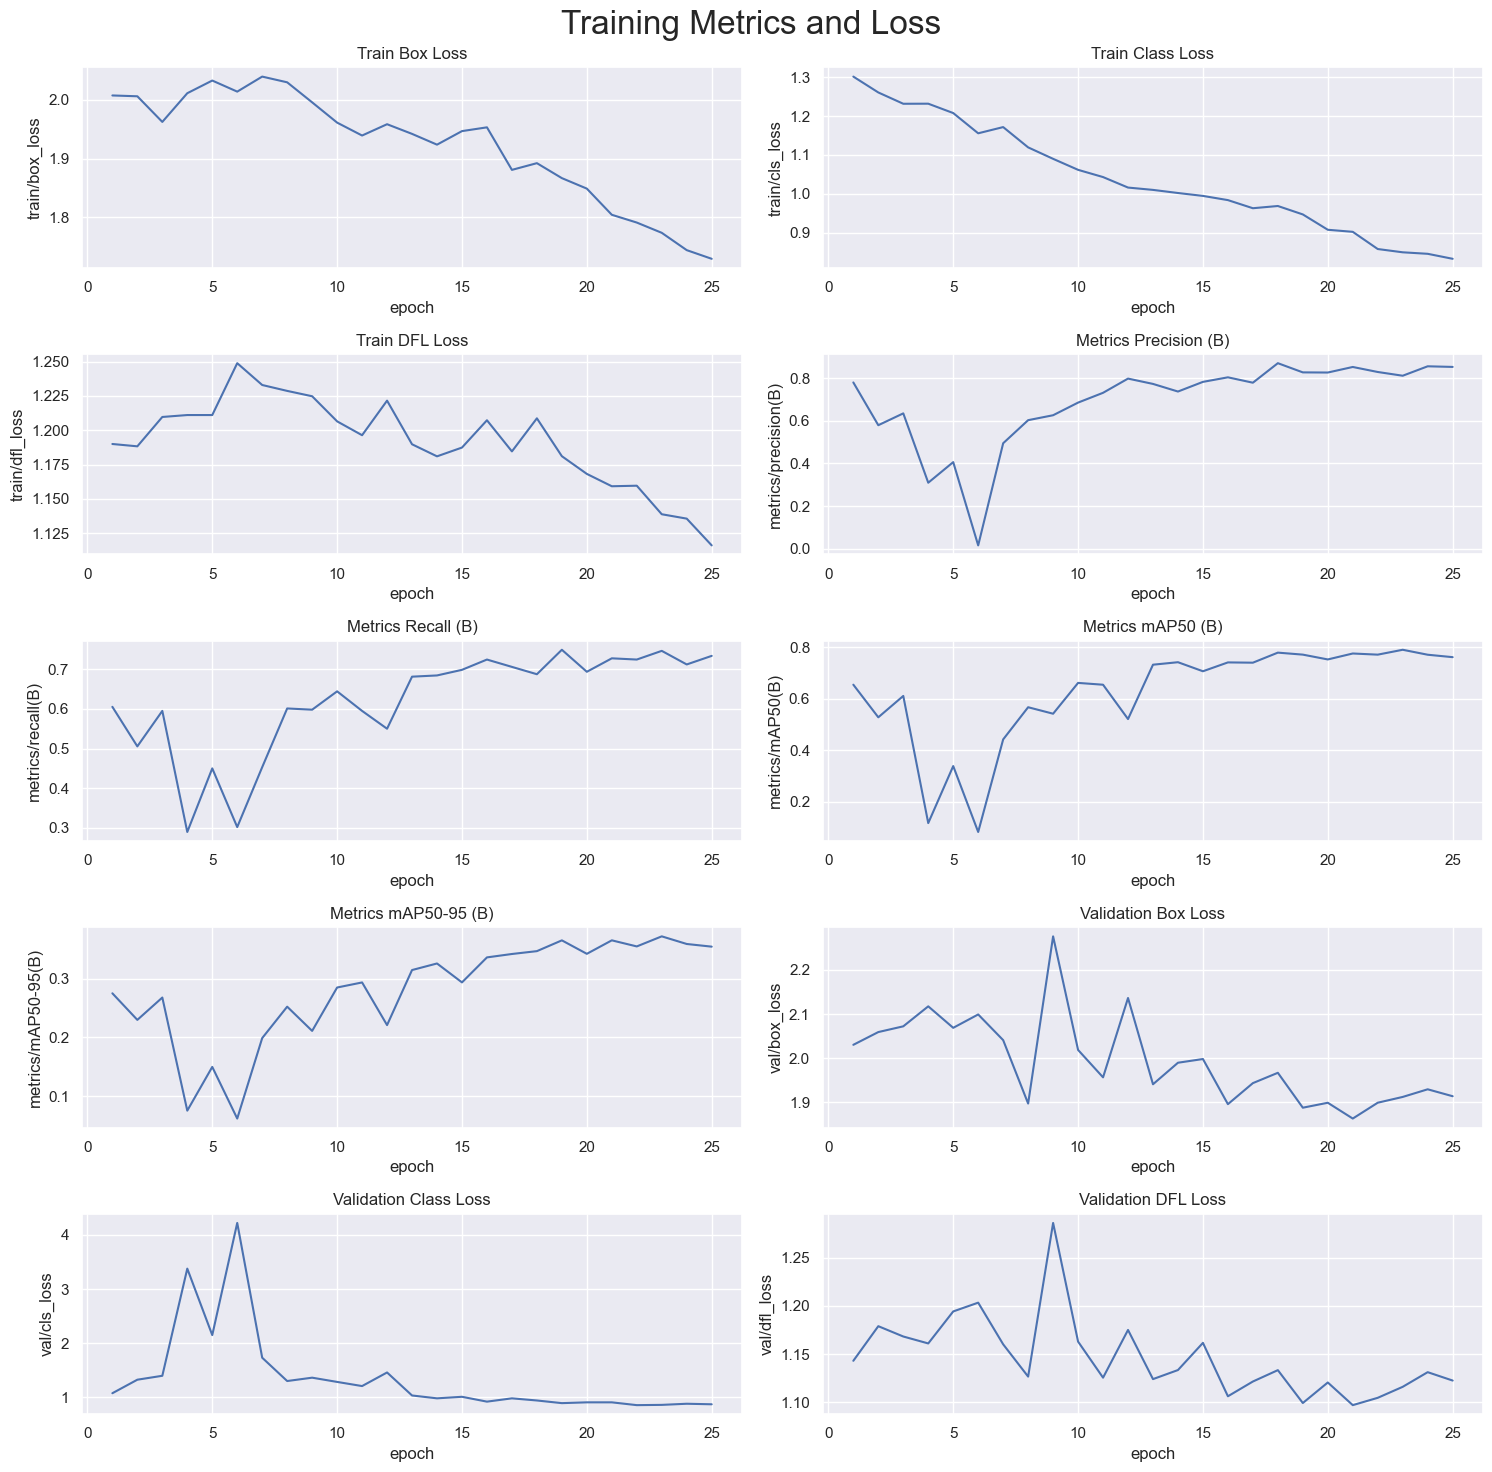

In [17]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [ ]:
# Loading the best performing model
Valid_model = YOLO('./train22/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

In [21]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):0.859308137657179 
metrics/recall(B): 0.7408660048787725
metrics/mAP50(B): 0.783611098212767
metrics/mAP50-95(B):0.35159050694440205 


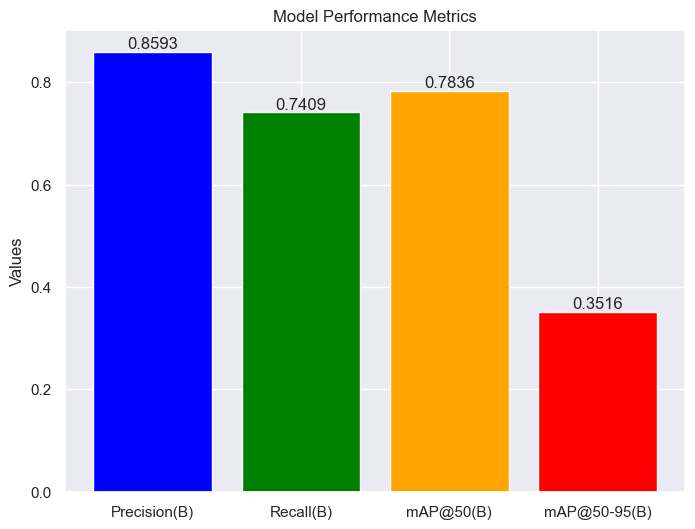

In [22]:
import matplotlib.pyplot as plt

# Example data from the results
precision = metrics.results_dict["metrics/precision(B)"]
recall = metrics.results_dict["metrics/recall(B)"]
mAP50 = metrics.results_dict["metrics/mAP50(B)"]
mAP50_95 = metrics.results_dict["metrics/mAP50-95(B)"]

# Metrics labels and values
metrics_labels = ['Precision(B)', 'Recall(B)', 'mAP@50(B)', 'mAP@50-95(B)']
metrics_values = [precision, recall, mAP50, mAP50_95]

# Plotting the metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics_labels, metrics_values, color=['blue', 'green', 'orange', 'red'])

# Adding titles and labels
plt.title('Model Performance Metrics')
plt.ylabel('Values')

# Display the plot
plt.show()



0: 640x640 1 Tas_Var, 14.7ms
Speed: 2.5ms preprocess, 14.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Tas_Var, 10.7ms
Speed: 3.2ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 2.8ms preprocess, 12.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 2.4ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Tas_Vars, 14.2ms
Speed: 2.9ms preprocess, 14.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Tas_Var, 16.0ms
Speed: 2.2ms preprocess, 16.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Tas_Var, 12.6ms
Speed: 2.5ms preprocess, 12.6ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Tas_Var, 10.4ms
Speed: 2.2ms preprocess, 10.4ms inference, 1.8ms postprocess per ima

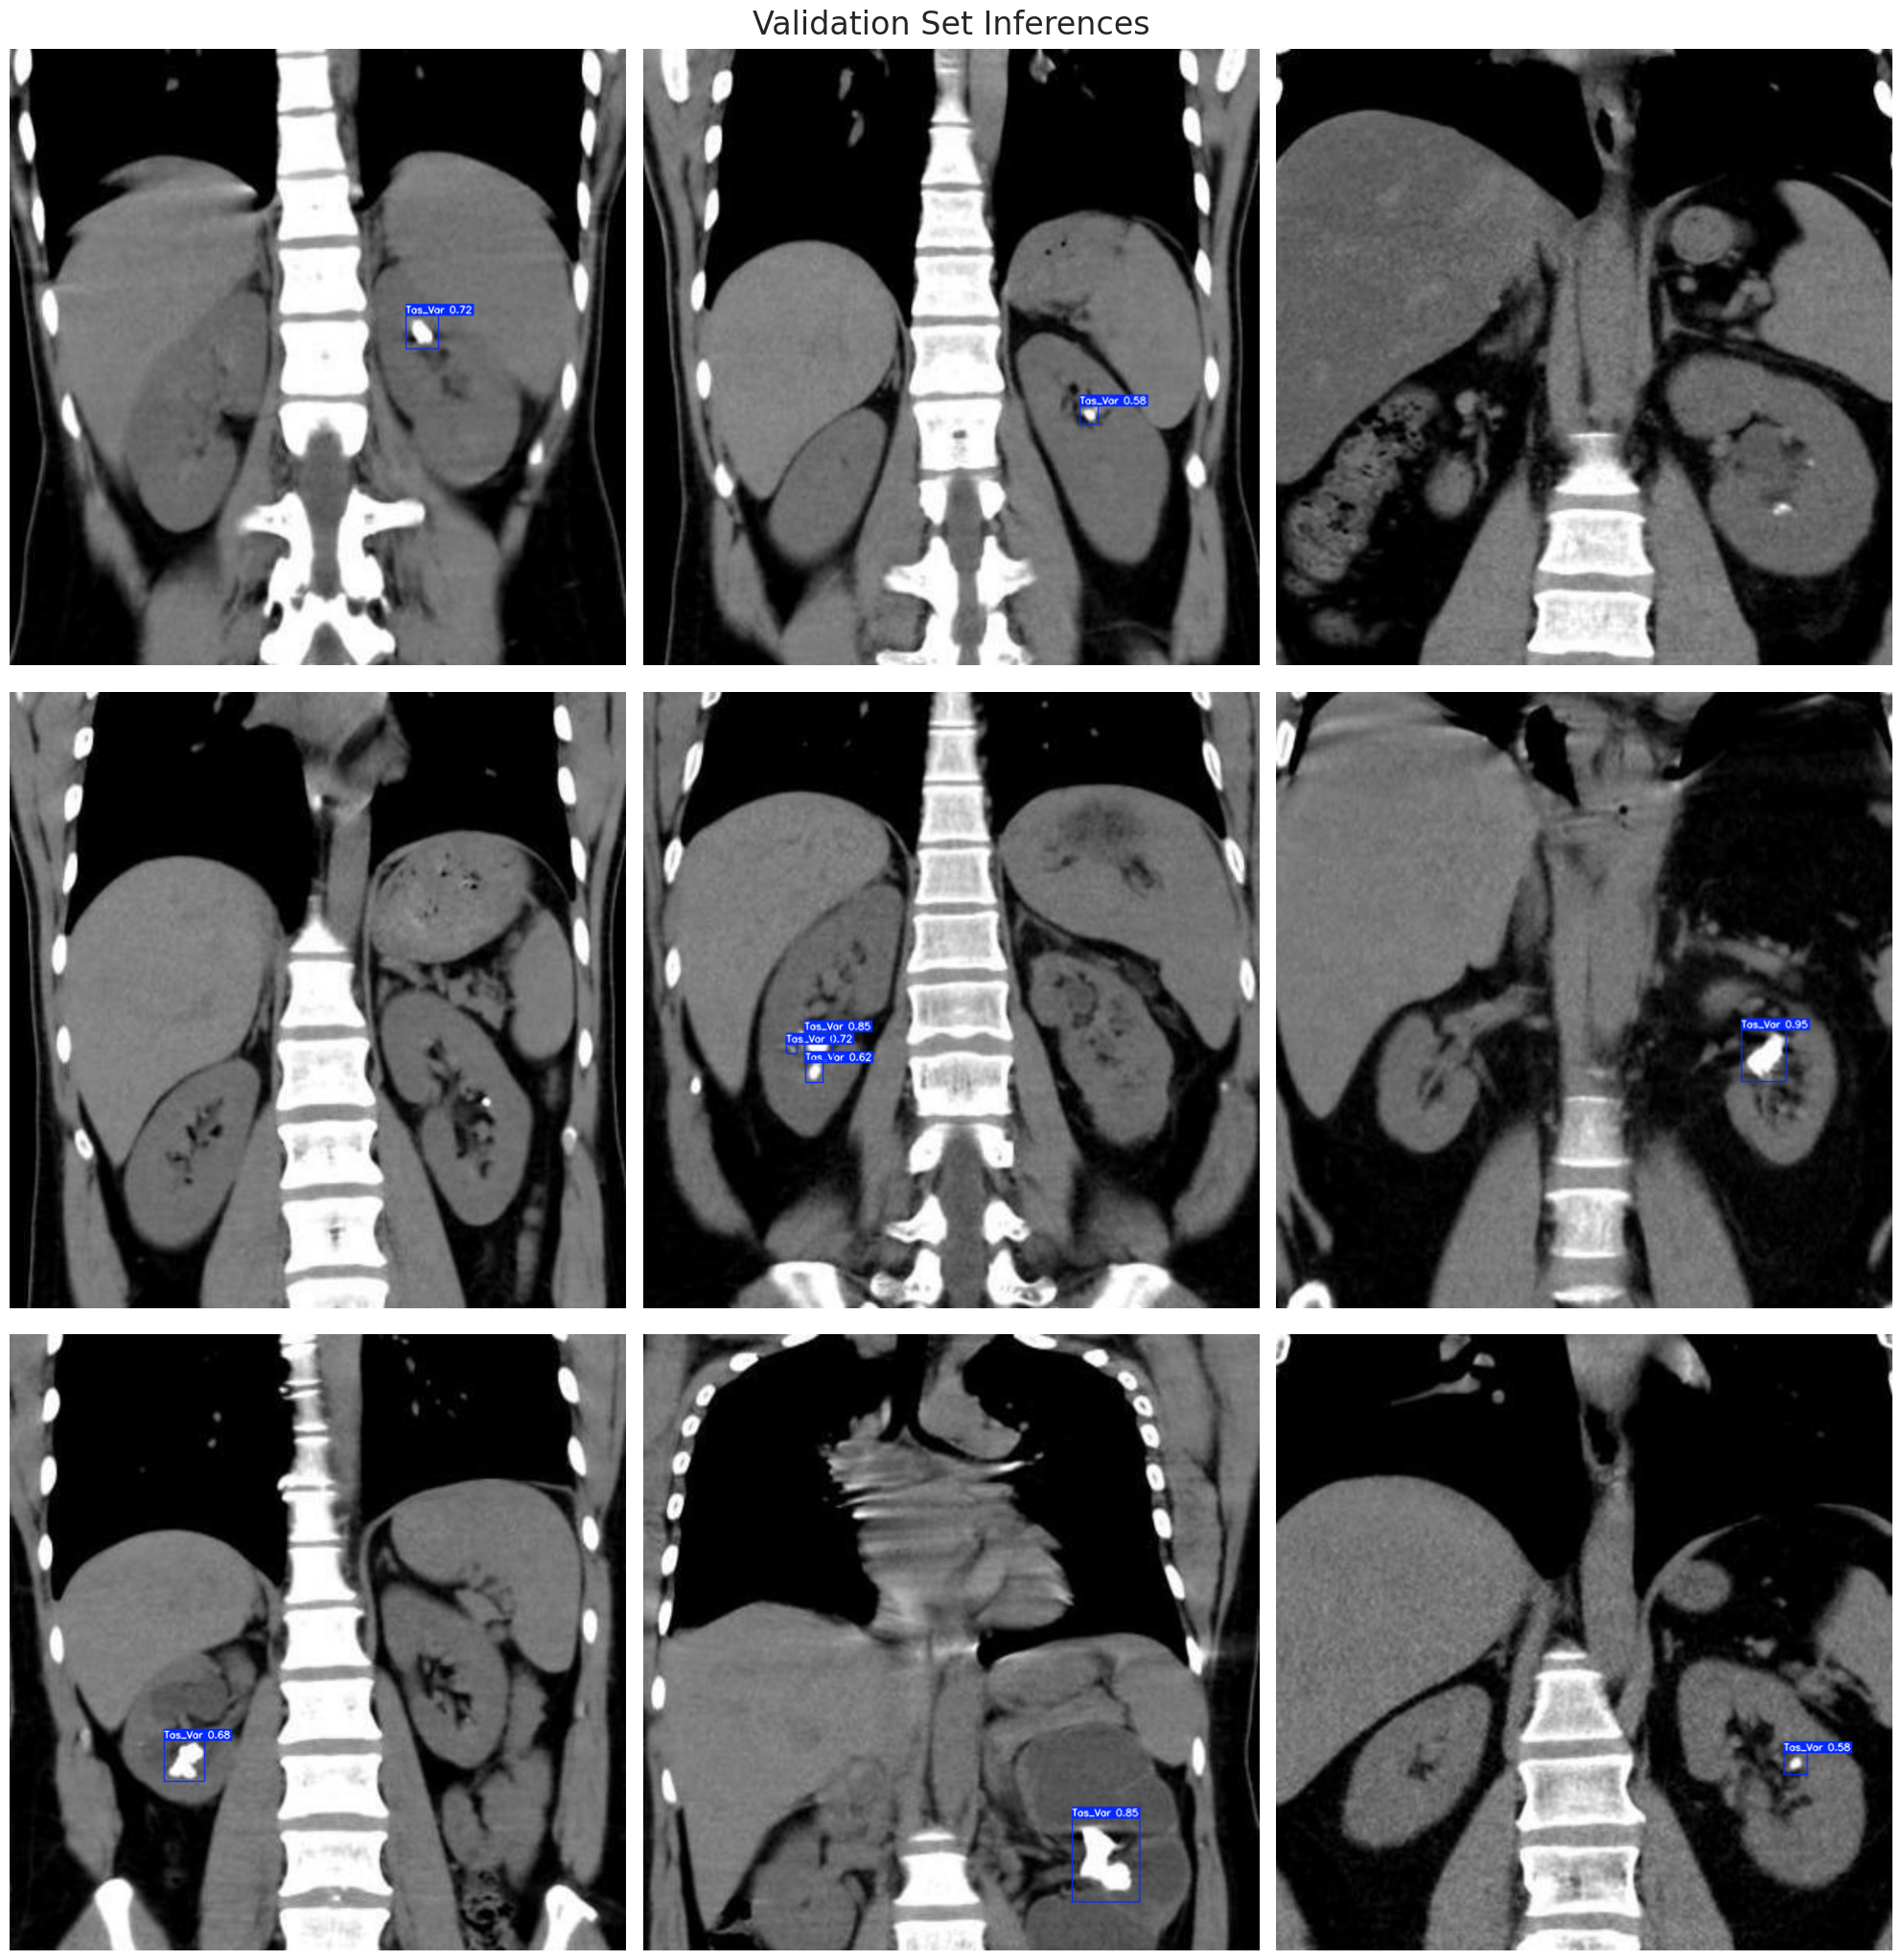

In [ ]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/drive/MyDrive/kidney/kidney/'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [23]:
# Export the model
Valid_model.export(format='onnx')

Ultralytics YOLOv8.2.103 🚀 Python-3.12.1 torch-2.4.0 CPU (Apple M1)



PyTorch: starting from 'train22/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.4 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 14.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 16.8s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

ONNX: export failure ❌ 16.8s: No module named 'onnx'


ModuleNotFoundError: No module named 'onnx'

'/content/runs.zip'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>